In [344]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [345]:
data = pd.read_csv("Combined Dataset.csv")

In [346]:
data['disposition'] = data['disposition'].replace({
    'CONFIRMED': 1,
    'CANDIDATE': 0,
    'FALSE POSITIVE': 0,
    'ACTIVE PLANET CANDIDATE': 0,
    'FALSE ALARM': 0,
    'REFUTED': 0
})


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\3678614794.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['disposition'] = data['disposition'].replace({


COMPARION BETWEEN CLASSIFICATION MODELS (TARGET DISPOSITION)

In [347]:
x_lin = data[['period', 'stellar_teff', 'stellar_logg', 'stellar_rad', 'stellar_mag', 'insolation', 'equilibrium_temp', 'stellar_mass', 'distance']]
y_lin = data['disposition'].astype(int)
scaler_lin = StandardScaler()
x_lin_scaled = scaler_lin.fit_transform(x_lin)


In [348]:
x_lin_train,x_lin_test,y_lin_train,y_lin_test = train_test_split(x_lin_scaled,y_lin,test_size=0.2,random_state=42)

In [349]:

Logistic_Regression = LogisticRegression(max_iter=25000,random_state=42)

Logistic_Regression.fit(x_lin_train, y_lin_train)
y_lin_pred_lr = Logistic_Regression.predict(x_lin_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_lin_test, y_lin_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_lin_test, y_lin_pred_lr))
print("Classification Report:\n", classification_report(y_lin_test, y_lin_pred_lr))


Logistic Regression Results:
Accuracy: 0.6944640753828033
Confusion Matrix:
 [[2797  183]
 [1114  151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81      2980
           1       0.45      0.12      0.19      1265

    accuracy                           0.69      4245
   macro avg       0.58      0.53      0.50      4245
weighted avg       0.64      0.69      0.63      4245



In [350]:
Random_Forest_Classifier = RandomForestClassifier(n_estimators=100, random_state=42)

Random_Forest_Classifier.fit(x_lin_train, y_lin_train)
y_lin_pred_rf = Random_Forest_Classifier.predict(x_lin_test)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_lin_test, y_lin_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_lin_test, y_lin_pred_rf))
print("Classification Report:\n", classification_report(y_lin_test, y_lin_pred_rf))

Random Forest Classifier Results:
Accuracy: 0.8214369846878681
Confusion Matrix:
 [[2764  216]
 [ 542  723]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      2980
           1       0.77      0.57      0.66      1265

    accuracy                           0.82      4245
   macro avg       0.80      0.75      0.77      4245
weighted avg       0.82      0.82      0.81      4245



In [351]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)

KNN_Classifier.fit(x_lin_train, y_lin_train)
y_lin_pred_knn = KNN_Classifier.predict(x_lin_test)
print("KNN Classifier Results:")
print("Accuracy:", accuracy_score(y_lin_test, y_lin_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_lin_test, y_lin_pred_knn))
print("Classification Report:\n", classification_report(y_lin_test, y_lin_pred_knn))

KNN Classifier Results:
Accuracy: 0.7613663133097762
Confusion Matrix:
 [[2524  456]
 [ 557  708]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      2980
           1       0.61      0.56      0.58      1265

    accuracy                           0.76      4245
   macro avg       0.71      0.70      0.71      4245
weighted avg       0.76      0.76      0.76      4245



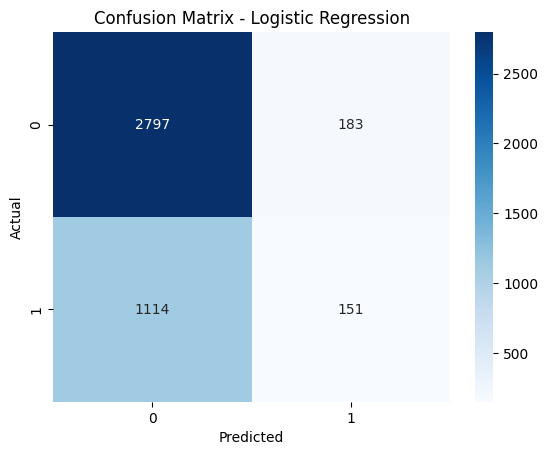

In [352]:
cm_lr = confusion_matrix(y_lin_test, y_lin_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


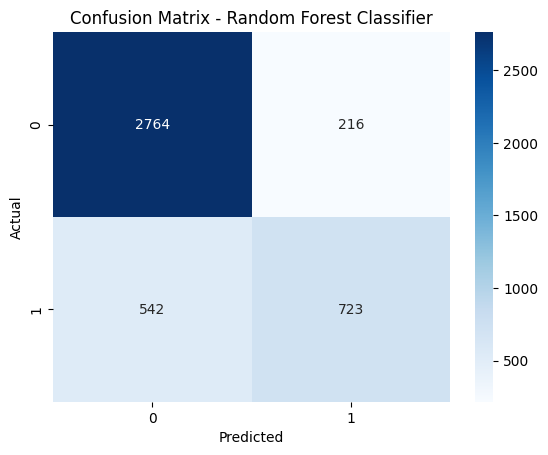

In [353]:
cm_lr = confusion_matrix(y_lin_test, y_lin_pred_rf)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

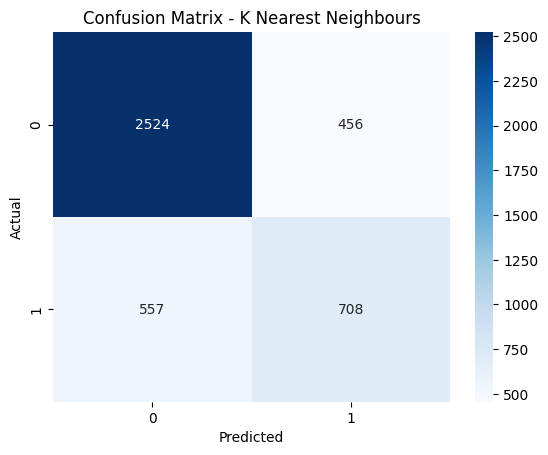

In [354]:
cm_lr = confusion_matrix(y_lin_test, y_lin_pred_knn)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix - K Nearest Neighbours")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\603005362.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=acc_scores, palette='Blues_d')


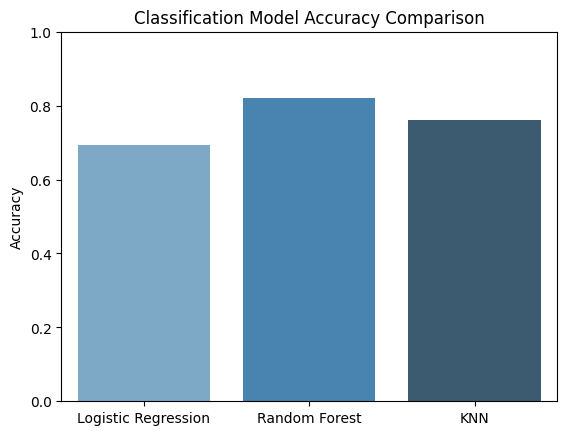

In [355]:
acc_scores = [
    accuracy_score(y_lin_test, y_lin_pred_lr),
    accuracy_score(y_lin_test, y_lin_pred_rf),
    accuracy_score(y_lin_test, y_lin_pred_knn)
]
models = ['Logistic Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=acc_scores, palette='Blues_d')

plt.ylabel("Accuracy")
plt.title("Classification Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

<Axes: >

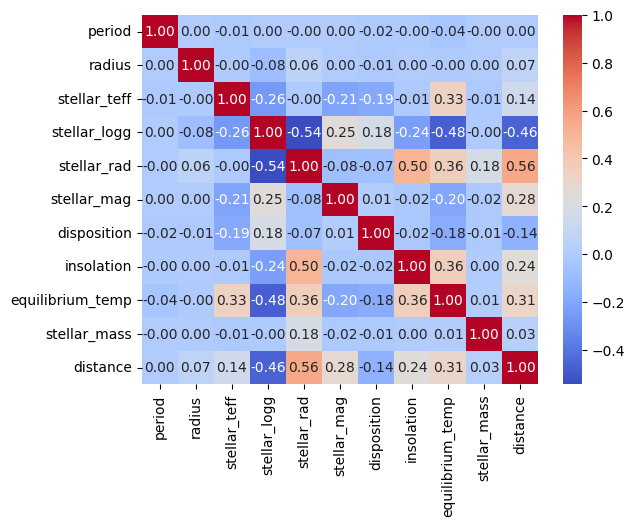

In [449]:
features = ['period', 'stellar_teff', 'stellar_logg', 'stellar_rad', 'stellar_mag', 'insolation', 'equilibrium_temp', 'stellar_mass', 'distance']
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

COMPARISON BETWEEN REGRESSION MODELS (TARGET RADIUS)

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [357]:
x_reg1 = data[['period', 'stellar_teff', 'stellar_logg', 'stellar_rad', 'stellar_mag', 'insolation', 'equilibrium_temp', 'stellar_mass', 'distance']]
y_reg1 = data['radius'].astype(float)

scaler_reg1 = StandardScaler()
x_reg1_scaled = scaler_reg1.fit_transform(x_reg1)

In [358]:
x_reg1_train, x_reg1_test, y_reg1_train, y_reg1_test = train_test_split(x_reg1_scaled, y_reg1, test_size=0.2, random_state=42)

In [359]:
baseline_pred1 = np.full(shape=y_reg1_test.shape, fill_value=np.mean(y_reg1_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg1_test, baseline_pred1))
print("Mean Squared Error :", mean_squared_error(y_reg1_test, baseline_pred1))
print("Mean Absolute Error :", mean_absolute_error(y_reg1_test, baseline_pred1))

Baseline Model Results:
R-squared : -0.0006218672486772991
Mean Squared Error : 16897747.70124945
Mean Absolute Error : 144.20875597090824


In [360]:
Linear_Regressor1 = LinearRegression()

Linear_Regressor1.fit(x_reg1_train, y_reg1_train)
y_reg1_pred_lr = Linear_Regressor1.predict(x_reg1_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg1_test, y_reg1_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg1_test, y_reg1_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg1_test, y_reg1_pred_lr))


Linear Regression Results:
R² Score: 0.005725063216529547
Mean Squared Error: 16790565.524656277
Mean Absolute Error: 161.47265299201885


In [361]:
Random_Forest_Regressor1 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor1.fit(x_reg1_train, y_reg1_train)
y_reg1_pred_rf = Random_Forest_Regressor1.predict(x_reg1_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg1_test, y_reg1_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg1_test, y_reg1_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg1_test, y_reg1_pred_rf))


Random Forest Regressor Results:
R² Score: 0.001890329543086544
Mean Squared Error: 16855323.61583561
Mean Absolute Error: 141.40278486565322


In [362]:
KNN_Regressor1 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor1.fit(x_reg1_train, y_reg1_train)
y_reg1_pred_knn = KNN_Regressor1.predict(x_reg1_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg1_test, y_reg1_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg1_test, y_reg1_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg1_test, y_reg1_pred_knn))


KNN Regressor Results:
R² Score: 0.08959632961418085
Mean Squared Error: 15374210.810293855
Mean Absolute Error: 132.73286196497529


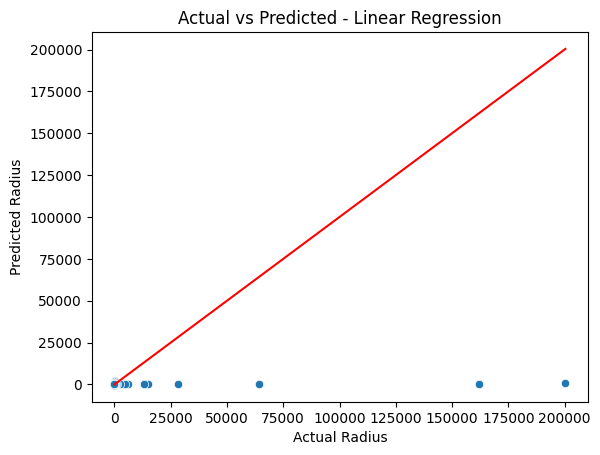

In [363]:
sns.scatterplot(x=y_reg1_test, y=y_reg1_pred_lr)
sns.lineplot(x=y_reg1_test, y=y_reg1_test, color='red')
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\1329702766.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


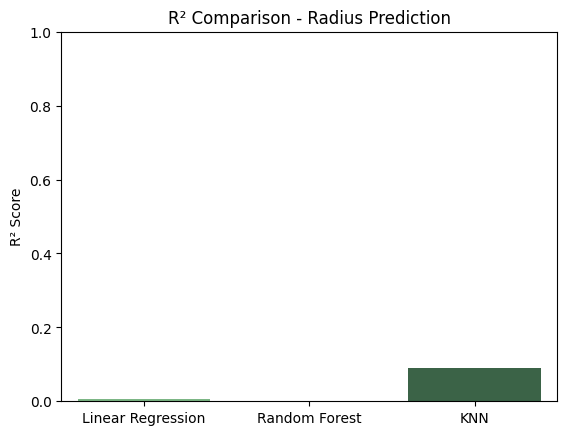

In [364]:
r2_scores = [
    r2_score(y_reg1_test, y_reg1_pred_lr),
    r2_score(y_reg1_test, y_reg1_pred_rf),
    r2_score(y_reg1_test, y_reg1_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\1086758484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


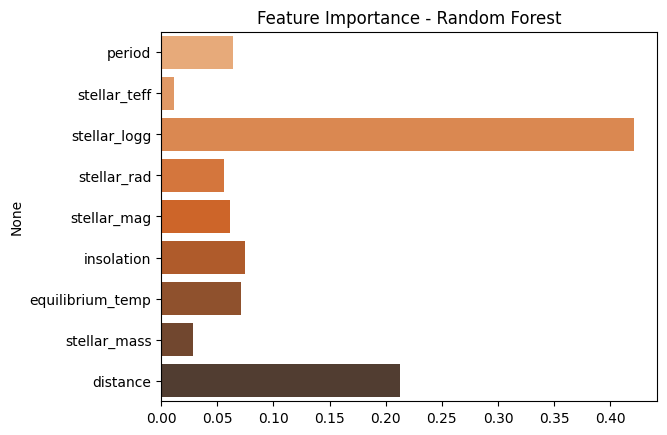

In [365]:
importances = Random_Forest_Regressor1.feature_importances_
features = x_reg1.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BEWTEEN REGERESSION MODELS (TAREGT DISTANCE)

In [366]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [367]:
x_reg2 = data[['radius','period', 'stellar_teff', 'stellar_logg', 'stellar_rad', 'stellar_mag', 'insolation', 'equilibrium_temp', 'stellar_mass']]
y_reg2 = data['distance'].astype(float)

scaler_reg2 = StandardScaler()
x_reg2_scaled = scaler_reg2.fit_transform(x_reg2)

In [368]:
x_reg2_train, x_reg2_test, y_reg2_train, y_reg2_test = train_test_split(x_reg2_scaled, y_reg2, test_size=0.2, random_state=42)

In [369]:
baseline_pred2 = np.full(shape=y_reg2_test.shape, fill_value=np.mean(y_reg2_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg2_test, baseline_pred2))
print("Mean Squared Error :", mean_squared_error(y_reg2_test, baseline_pred2))
print("Mean Absolute Error :", mean_absolute_error(y_reg2_test, baseline_pred2))

Baseline Model Results:
R-squared : -1.2310304305263031e-05
Mean Squared Error : 1169628.8316991457
Mean Absolute Error : 481.5097363508521


In [370]:
Linear_Regressor2 = LinearRegression()

Linear_Regressor2.fit(x_reg2_train, y_reg2_train)
y_reg2_pred_lr = Linear_Regressor2.predict(x_reg2_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg2_test, y_reg2_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg2_test, y_reg2_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg2_test, y_reg2_pred_lr))


Linear Regression Results:
R² Score: 0.6060197757774859
Mean Squared Error: 460804.9567207041
Mean Absolute Error: 279.43366761249274


In [371]:
Random_Forest_Regressor2 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor2.fit(x_reg2_train, y_reg2_train)
y_reg2_pred_rf = Random_Forest_Regressor2.predict(x_reg2_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg2_test, y_reg2_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg2_test, y_reg2_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg2_test, y_reg2_pred_rf))


Random Forest Regressor Results:
R² Score: 0.7366536694089036
Mean Squared Error: 308013.6692395225
Mean Absolute Error: 101.65980528697752


In [372]:
KNN_Regressor2 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor2.fit(x_reg2_train, y_reg2_train)
y_reg2_pred_knn = KNN_Regressor2.predict(x_reg2_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg2_test, y_reg2_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg2_test, y_reg2_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg2_test, y_reg2_pred_knn))


KNN Regressor Results:
R² Score: 0.6402420510457494
Mean Squared Error: 420778.0896235128
Mean Absolute Error: 139.22590155473694


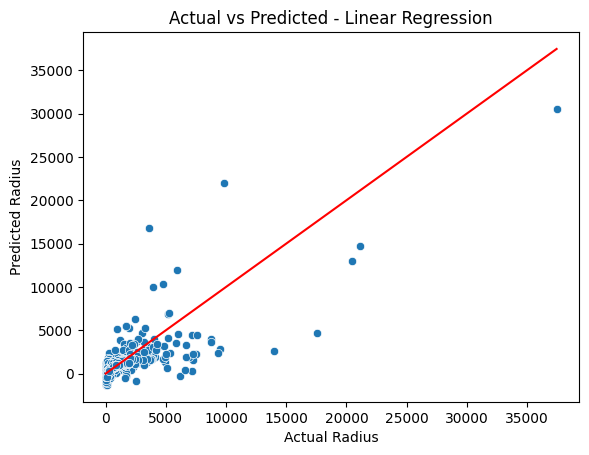

In [373]:
sns.scatterplot(x=y_reg2_test, y=y_reg2_pred_lr)
sns.lineplot(x=y_reg2_test, y=y_reg2_test, color='red') 
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\2022338592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


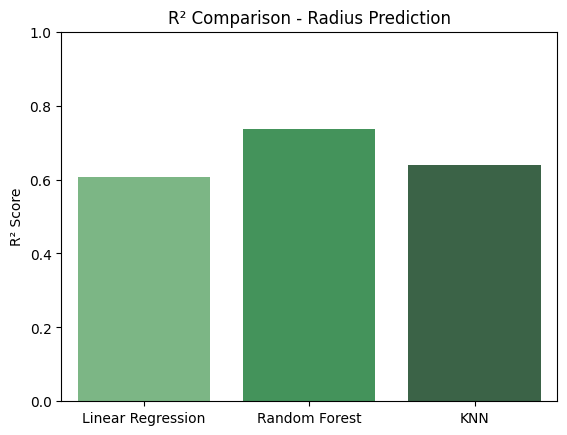

In [374]:
r2_scores = [
    r2_score(y_reg2_test, y_reg2_pred_lr),
    r2_score(y_reg2_test, y_reg2_pred_rf),
    r2_score(y_reg2_test, y_reg2_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)  # optional
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\3109288435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


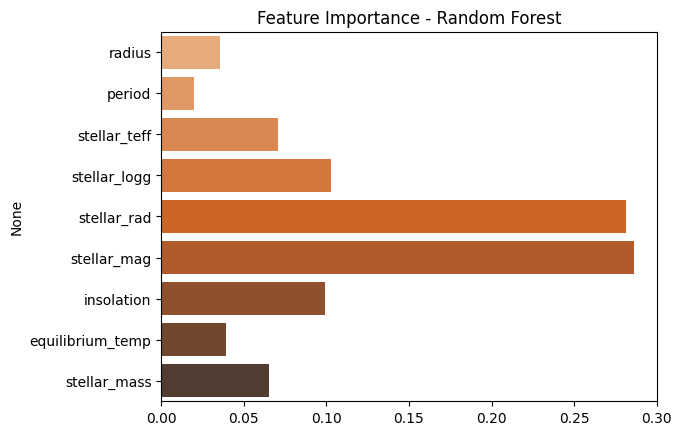

In [440]:
importances = Random_Forest_Regressor2.feature_importances_
features = x_reg2.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BETWEEN REGRESSION MODELS (TARGET EQUILIBRIUM TEMPERATURE)

In [376]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [377]:
x_reg3 = data[['distance','radius','period', 'stellar_teff', 'stellar_logg', 'stellar_rad', 'stellar_mag', 'insolation', 'stellar_mass']]
y_reg3 = data['equilibrium_temp'].astype(float)

scaler_reg3 = StandardScaler()
x_reg3_scaled = scaler_reg3.fit_transform(x_reg3)

In [378]:
x_reg3_train, x_reg3_test, y_reg3_train, y_reg3_test = train_test_split(x_reg3_scaled, y_reg3, test_size=0.2, random_state=42)

In [379]:
baseline_pred3 = np.full(shape=y_reg3_test.shape, fill_value=np.mean(y_reg3_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg3_test, baseline_pred3))
print("Mean Squared Error :", mean_squared_error(y_reg3_test, baseline_pred3))
print("Mean Absolute Error :", mean_absolute_error(y_reg3_test, baseline_pred3))

Baseline Model Results:
R-squared : -0.0001985447989780731
Mean Squared Error : 560071.6485414348
Mean Absolute Error : 469.02112682562563


In [380]:
Linear_Regressor3 = LinearRegression()

Linear_Regressor3.fit(x_reg3_train, y_reg3_train)
y_reg3_pred_lr = Linear_Regressor3.predict(x_reg3_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg3_test, y_reg3_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg3_test, y_reg3_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg3_test, y_reg3_pred_lr))


Linear Regression Results:
R² Score: 0.4001462277445037
Mean Squared Error: 335894.40102460486
Mean Absolute Error: 400.6651937911075


In [381]:
Random_Forest_Regressor3 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor3.fit(x_reg3_train, y_reg3_train)
y_reg3_pred_rf = Random_Forest_Regressor3.predict(x_reg3_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg3_test, y_reg3_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg3_test, y_reg3_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg3_test, y_reg3_pred_rf))


Random Forest Regressor Results:
R² Score: 0.9859291944962847
Mean Squared Error: 7879.0948814623725
Mean Absolute Error: 26.594796804416735


In [382]:
KNN_Regressor3 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor3.fit(x_reg3_train, y_reg3_train)
y_reg3_pred_knn = KNN_Regressor3.predict(x_reg3_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg3_test, y_reg3_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg3_test, y_reg3_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg3_test, y_reg3_pred_knn))


KNN Regressor Results:
R² Score: 0.6069861306071636
Mean Squared Error: 220072.23153352362
Mean Absolute Error: 316.6935288339882


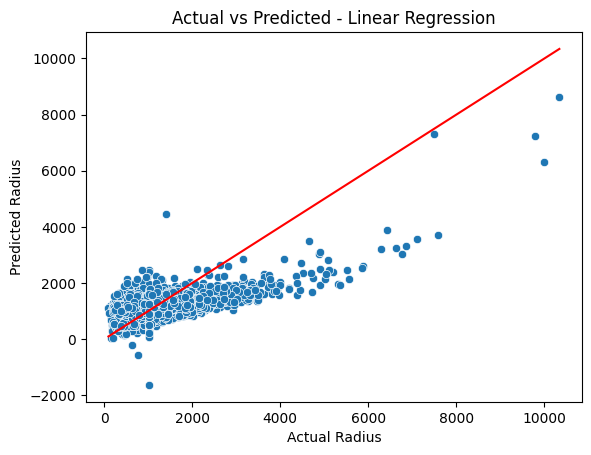

In [383]:
sns.scatterplot(x=y_reg3_test, y=y_reg3_pred_lr)
sns.lineplot(x=y_reg3_test, y=y_reg3_test, color='red')  
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\3209346873.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


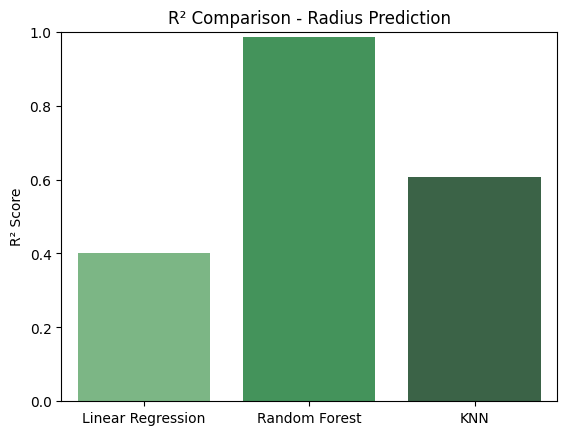

In [ ]:
r2_scores = [
    r2_score(y_reg3_test, y_reg3_pred_lr),
    r2_score(y_reg3_test, y_reg3_pred_rf),
    r2_score(y_reg3_test, y_reg3_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1) 
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\2689075016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


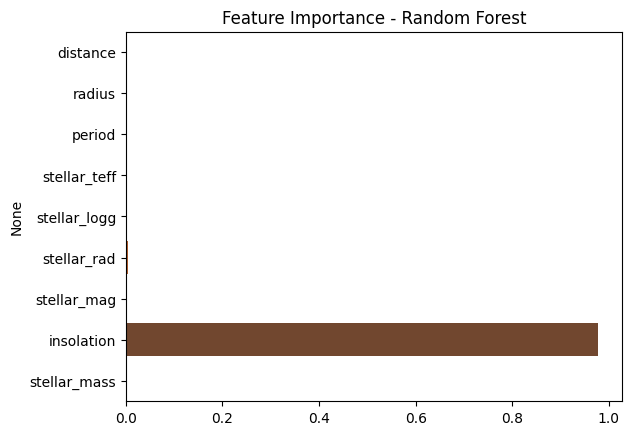

In [442]:
importances = Random_Forest_Regressor3.feature_importances_
features = x_reg3.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BETWEEN REGRESSION MODLES (TARGET INSOLATION)

In [386]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [387]:
x_reg4 = data[['equilibrium_temp','distance','radius','period', 'stellar_teff', 'stellar_logg', 'stellar_rad', 'stellar_mag', 'stellar_mass']]
y_reg4 = data[ 'insolation'].astype(float)

scaler_reg4 = StandardScaler()
x_reg4_scaled = scaler_reg4.fit_transform(x_reg4)

In [388]:
x_reg4_train, x_reg4_test, y_reg4_train, y_reg4_test = train_test_split(x_reg4_scaled, y_reg4, test_size=0.2, random_state=42)

In [389]:
baseline_pred4 = np.full(shape=y_reg4_test.shape, fill_value=np.mean(y_reg4_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg4_test, baseline_pred4))
print("Mean Squared Error :", mean_squared_error(y_reg4_test, baseline_pred4))
print("Mean Absolute Error :", mean_absolute_error(y_reg4_test, baseline_pred4))

Baseline Model Results:
R-squared : -0.00013255286738300676
Mean Squared Error : 4848383628.477558
Mean Absolute Error : 7442.664643944278


In [390]:
Linear_Regressor4 = LinearRegression()

Linear_Regressor4.fit(x_reg4_train, y_reg4_train)
y_reg4_pred_lr = Linear_Regressor4.predict(x_reg4_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg4_test, y_reg4_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg4_test, y_reg4_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg4_test, y_reg4_pred_lr))


Linear Regression Results:
R² Score: -0.06580993483490483
Mean Squared Error: 5166770568.868272
Mean Absolute Error: 19690.913050415835


In [391]:
Random_Forest_Regressor4 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor4.fit(x_reg4_train, y_reg4_train)
y_reg4_pred_rf = Random_Forest_Regressor4.predict(x_reg4_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg4_test, y_reg4_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg4_test, y_reg4_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg4_test, y_reg4_pred_rf))


Random Forest Regressor Results:
R² Score: 0.9912024182163061
Mean Squared Error: 42648398.322767384
Mean Absolute Error: 465.20732800190217


In [392]:
KNN_Regressor4 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor4.fit(x_reg4_train, y_reg4_train)
y_reg4_pred_knn = KNN_Regressor4.predict(x_reg4_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg4_test, y_reg4_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg4_test, y_reg4_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg4_test, y_reg4_pred_knn))


KNN Regressor Results:
R² Score: 0.29671261492607903
Mean Squared Error: 3409355124.109563
Mean Absolute Error: 2520.65477343143


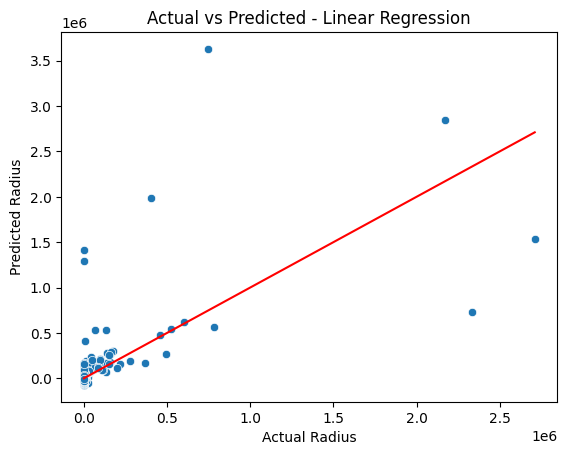

In [393]:
sns.scatterplot(x=y_reg4_test, y=y_reg4_pred_lr)
sns.lineplot(x=y_reg4_test, y=y_reg4_test, color='red')  
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\352045557.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


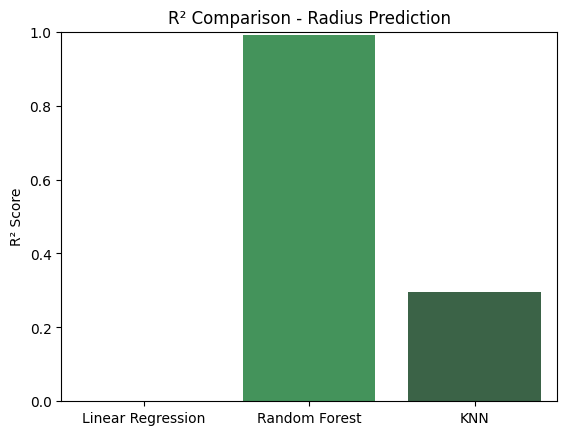

In [394]:
r2_scores = [
    r2_score(y_reg4_test, y_reg4_pred_lr),
    r2_score(y_reg4_test, y_reg4_pred_rf),
    r2_score(y_reg4_test, y_reg4_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)  # optional
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\391372038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


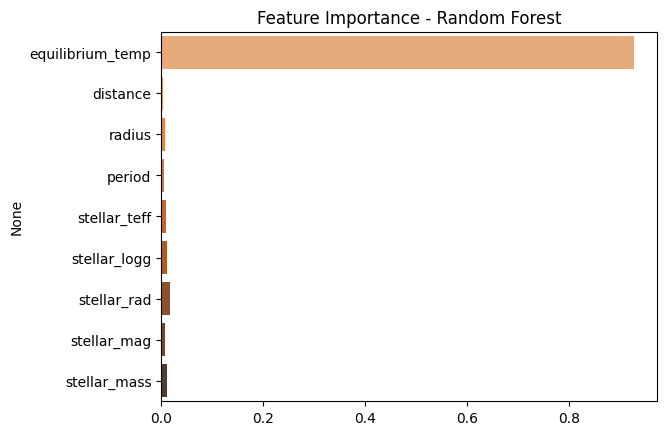

In [443]:
importances = Random_Forest_Regressor4.feature_importances_
features = x_reg4.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BETWEEN REGRESSION MODLES (TARGET STELLAR MAGNITUDE)

In [395]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [396]:
x_reg5 = data[['equilibrium_temp','distance','radius','period', 'stellar_teff', 'stellar_logg', 'stellar_rad', 'insolation', 'stellar_mass']]
y_reg5 = data['stellar_mag'].astype(float)

scaler_reg5 = StandardScaler()
x_reg5_scaled = scaler_reg5.fit_transform(x_reg5)

In [397]:
x_reg5_train, x_reg5_test, y_reg5_train, y_reg5_test = train_test_split(x_reg5_scaled, y_reg5, test_size=0.2, random_state=42)

In [398]:
baseline_pred5 = np.full(shape=y_reg5_test.shape, fill_value=np.mean(y_reg5_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg5_test, baseline_pred5))
print("Mean Squared Error :", mean_squared_error(y_reg5_test, baseline_pred5))
print("Mean Absolute Error :", mean_absolute_error(y_reg5_test, baseline_pred5))

Baseline Model Results:
R-squared : -1.9185366522123104e-06
Mean Squared Error : 3.936014474217137
Mean Absolute Error : 1.5820699553677375


In [399]:
Linear_Regressor5 = LinearRegression()

Linear_Regressor5.fit(x_reg5_train, y_reg5_train)
y_reg5_pred_lr = Linear_Regressor5.predict(x_reg5_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg5_test, y_reg5_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg5_test, y_reg5_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg5_test, y_reg5_pred_lr))


Linear Regression Results:
R² Score: 0.34844300212451373
Mean Squared Error: 2.5645328542651016
Mean Absolute Error: 1.208225851499426


In [400]:
Random_Forest_Regressor5 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor5.fit(x_reg5_train, y_reg5_train)
y_reg5_pred_rf = Random_Forest_Regressor5.predict(x_reg5_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg5_test, y_reg5_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg5_test, y_reg5_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg5_test, y_reg5_pred_rf))


Random Forest Regressor Results:
R² Score: 0.927111314372901
Mean Squared Error: 0.28689037122523203
Mean Absolute Error: 0.24816513106007076


In [401]:
KNN_Regressor5 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor5.fit(x_reg5_train, y_reg5_train)
y_reg5_pred_knn = KNN_Regressor5.predict(x_reg5_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg5_test, y_reg5_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg5_test, y_reg5_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg5_test, y_reg5_pred_knn))


KNN Regressor Results:
R² Score: 0.8624282113944083
Mean Squared Error: 0.541483512339584
Mean Absolute Error: 0.4302660152650176


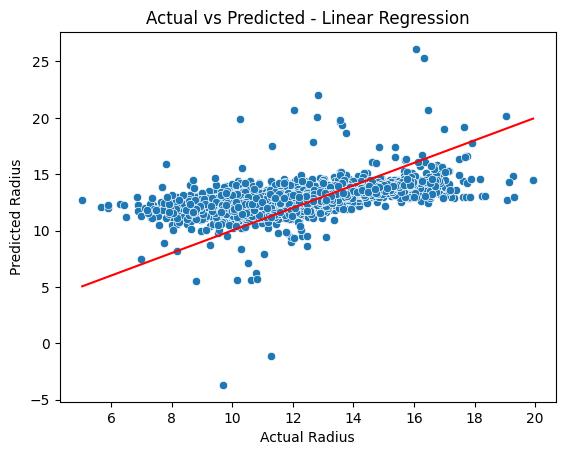

In [402]:
sns.scatterplot(x=y_reg5_test, y=y_reg5_pred_lr)
sns.lineplot(x=y_reg5_test, y=y_reg5_test, color='red')  
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\1713173574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


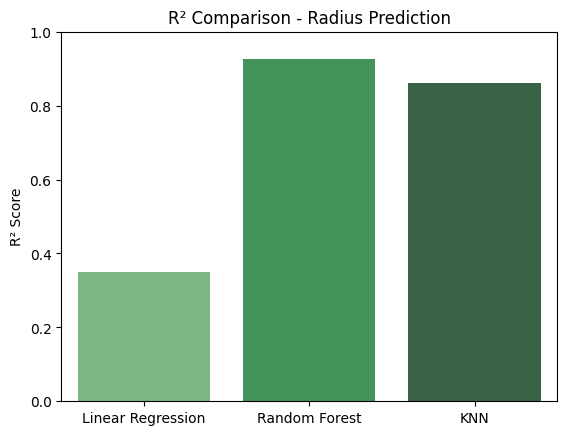

In [403]:
r2_scores = [
    r2_score(y_reg5_test, y_reg5_pred_lr),
    r2_score(y_reg5_test, y_reg5_pred_rf),
    r2_score(y_reg5_test, y_reg5_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)  # optional
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\2336127954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


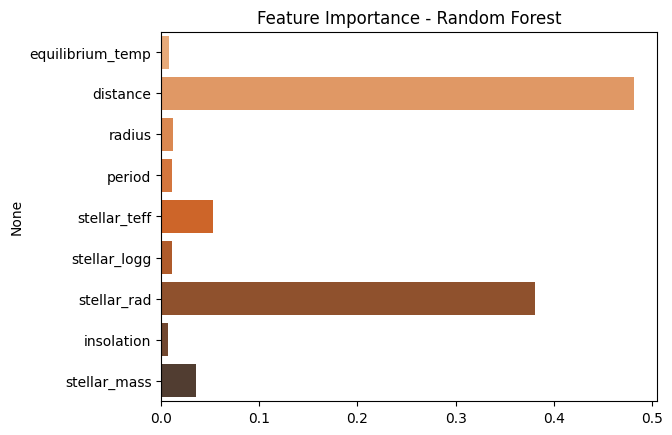

In [444]:
importances = Random_Forest_Regressor5.feature_importances_
features = x_reg5.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BETWEEN REGRESSION MODELS (TARGET STELLAR RADIUS)

In [404]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [405]:
x_reg6 = data[['equilibrium_temp','distance','radius','period', 'stellar_teff', 'stellar_logg', 'stellar_mag', 'insolation', 'stellar_mass']]
y_reg6 = data['stellar_rad'].astype(float)

scaler_reg6 = StandardScaler()
x_reg6_scaled = scaler_reg6.fit_transform(x_reg6)

In [406]:
x_reg6_train, x_reg6_test, y_reg6_train, y_reg6_test = train_test_split(x_reg6_scaled, y_reg6, test_size=0.2, random_state=42)

In [407]:
baseline_pred6 = np.full(shape=y_reg6_test.shape, fill_value=np.mean(y_reg6_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg6_test, baseline_pred6))
print("Mean Squared Error :", mean_squared_error(y_reg6_test, baseline_pred6))
print("Mean Absolute Error :", mean_absolute_error(y_reg6_test, baseline_pred6))

Baseline Model Results:
R-squared : -0.00025746672890325506
Mean Squared Error : 30.685105857080032
Mean Absolute Error : 0.9147795456007893


In [408]:
Linear_Regressor6 = LinearRegression()

Linear_Regressor6.fit(x_reg6_train, y_reg6_train)
y_reg6_pred_lr = Linear_Regressor6.predict(x_reg6_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg6_test, y_reg6_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg6_test, y_reg6_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg6_test, y_reg6_pred_lr))


Linear Regression Results:
R² Score: 0.5454541115411008
Mean Squared Error: 13.944198537077297
Mean Absolute Error: 0.7221430931350994


In [409]:
Random_Forest_Regressor6 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor6.fit(x_reg6_train, y_reg6_train)
y_reg6_pred_rf = Random_Forest_Regressor6.predict(x_reg6_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg6_test, y_reg6_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg6_test, y_reg6_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg6_test, y_reg6_pred_rf))


Random Forest Regressor Results:
R² Score: 0.8529130236900723
Mean Squared Error: 4.51221769233861
Mean Absolute Error: 0.12201925310082451


In [410]:
KNN_Regressor6 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor6.fit(x_reg6_train, y_reg6_train)
y_reg6_pred_knn = KNN_Regressor6.predict(x_reg6_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg6_test, y_reg6_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg6_test, y_reg6_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg6_test, y_reg6_pred_knn))


KNN Regressor Results:
R² Score: 0.5788794964276733
Mean Squared Error: 12.918801069251042
Mean Absolute Error: 0.26817148791519435


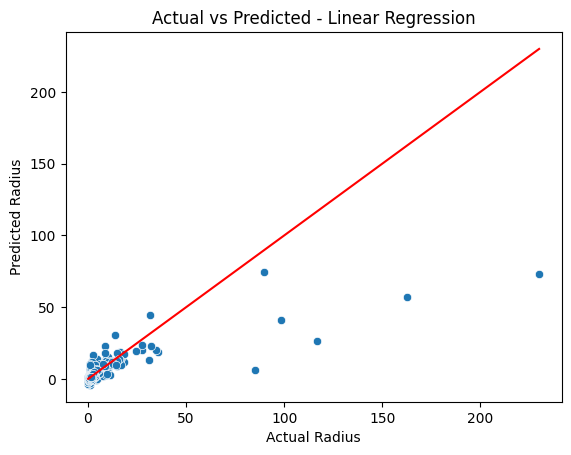

In [411]:
sns.scatterplot(x=y_reg6_test, y=y_reg6_pred_lr)
sns.lineplot(x=y_reg6_test, y=y_reg6_test, color='red')  
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\3369316552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


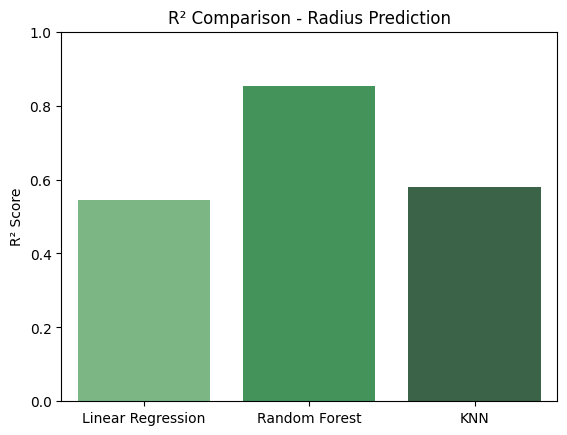

In [412]:
r2_scores = [
    r2_score(y_reg6_test, y_reg6_pred_lr),
    r2_score(y_reg6_test, y_reg6_pred_rf),
    r2_score(y_reg6_test, y_reg6_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)  # optional
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\1250988863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


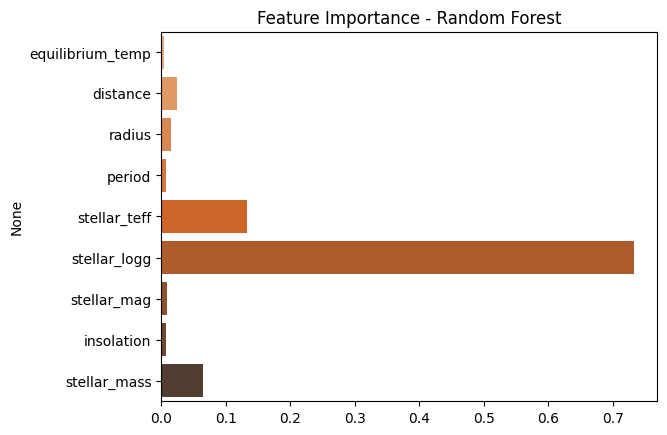

In [445]:
importances = Random_Forest_Regressor6.feature_importances_
features = x_reg6.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BETWEEN REGRESSION MODLES (TARGET SURFACE GRAVITY)

In [413]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [414]:
x_reg7 = data[['equilibrium_temp','distance','radius','period', 'stellar_teff', 'stellar_rad', 'stellar_mag', 'insolation', 'stellar_mass']]
y_reg7 = data['stellar_logg'].astype(float)

scaler_reg7 = StandardScaler()
x_reg7_scaled = scaler_reg7.fit_transform(x_reg7)

In [415]:
x_reg7_train, x_reg7_test, y_reg7_train, y_reg7_test = train_test_split(x_reg7_scaled, y_reg7, test_size=0.2, random_state=42)

In [416]:
baseline_pred7 = np.full(shape=y_reg7_test.shape, fill_value=np.mean(y_reg7_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg7_test, baseline_pred7))
print("Mean Squared Error :", mean_squared_error(y_reg7_test, baseline_pred7))
print("Mean Absolute Error :", mean_absolute_error(y_reg7_test, baseline_pred7))

Baseline Model Results:
R-squared : -1.4274276083359183e-06
Mean Squared Error : 0.13963858680450286
Mean Absolute Error : 0.23455688231357688


In [417]:
Linear_Regressor7 = LinearRegression()

Linear_Regressor7.fit(x_reg7_train, y_reg7_train)
y_reg7_pred_lr = Linear_Regressor7.predict(x_reg7_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg7_test, y_reg7_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg7_test, y_reg7_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg7_test, y_reg7_pred_lr))


Linear Regression Results:
R² Score: 0.4619441167358682
Mean Squared Error: 0.07513325591356812
Mean Absolute Error: 0.16246085599567


In [418]:
Random_Forest_Regressor7 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor7.fit(x_reg7_train, y_reg7_train)
y_reg7_pred_rf = Random_Forest_Regressor7.predict(x_reg7_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg7_test, y_reg7_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg7_test, y_reg7_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg7_test, y_reg7_pred_rf))


Random Forest Regressor Results:
R² Score: 0.9756738931202973
Mean Squared Error: 0.003396858338367606
Mean Absolute Error: 0.014798040444669112


In [419]:
KNN_Regressor7 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor7.fit(x_reg7_train, y_reg7_train)
y_reg7_pred_knn = KNN_Regressor7.predict(x_reg7_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg7_test, y_reg7_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg7_test, y_reg7_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg7_test, y_reg7_pred_knn))


KNN Regressor Results:
R² Score: 0.8294084173480529
Mean Squared Error: 0.023821133519317788
Mean Absolute Error: 0.08258254699646644


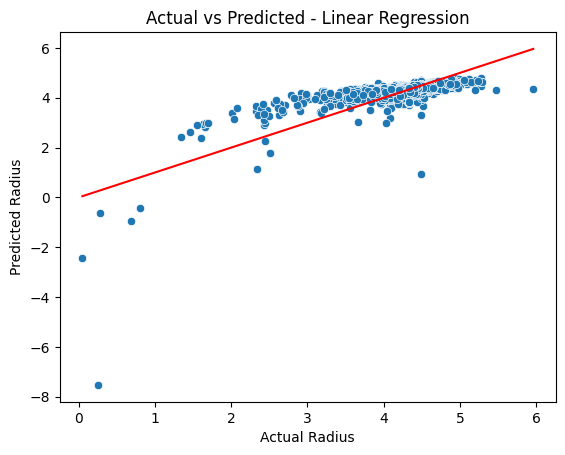

In [420]:
sns.scatterplot(x=y_reg7_test, y=y_reg7_pred_lr)
sns.lineplot(x=y_reg7_test, y=y_reg7_test, color='red')  
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\2697263414.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


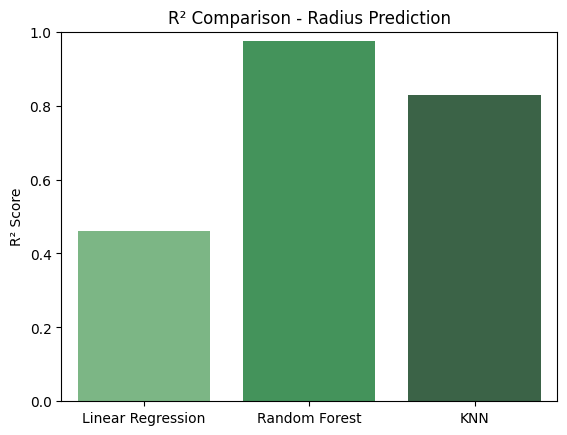

In [421]:
r2_scores = [
    r2_score(y_reg7_test, y_reg7_pred_lr),
    r2_score(y_reg7_test, y_reg7_pred_rf),
    r2_score(y_reg7_test, y_reg7_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)  # optional
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\2489734432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


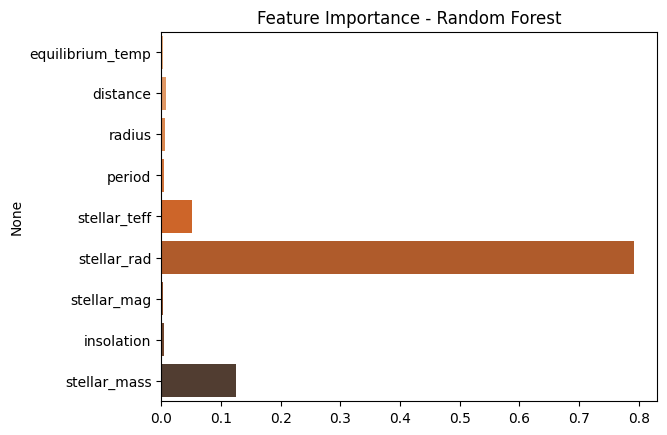

In [446]:
importances = Random_Forest_Regressor7.feature_importances_
features = x_reg7.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BETWEEN REGRESSION MODELS (TARGET EFFECTIVE TEMPERATURE)

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [423]:
x_reg8 = data[['stellar_logg','equilibrium_temp','distance','radius','period', 'stellar_rad', 'stellar_mag', 'insolation', 'stellar_mass']]
y_reg8 = data['stellar_teff'].astype(float)

scaler_reg8 = StandardScaler()
x_reg8_scaled = scaler_reg8.fit_transform(x_reg8)

In [424]:
x_reg8_train, x_reg8_test, y_reg8_train, y_reg8_test = train_test_split(x_reg8_scaled, y_reg8, test_size=0.2, random_state=42)

In [425]:
baseline_pred8 = np.full(shape=y_reg8_test.shape, fill_value=np.mean(y_reg8_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg8_test, baseline_pred8))
print("Mean Squared Error :", mean_squared_error(y_reg8_test, baseline_pred8))
print("Mean Absolute Error :", mean_absolute_error(y_reg8_test, baseline_pred8))

Baseline Model Results:
R-squared : -0.0007606887055831013
Mean Squared Error : 971717.0685323086
Mean Absolute Error : 682.1870003823974


In [426]:
Linear_Regressor8 = LinearRegression()

Linear_Regressor8.fit(x_reg8_train, y_reg8_train)
y_reg8_pred_lr = Linear_Regressor8.predict(x_reg8_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg8_test, y_reg8_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg8_test, y_reg8_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg8_test, y_reg8_pred_lr))


Linear Regression Results:
R² Score: 0.26217703394946756
Mean Squared Error: 716410.2045152972
Mean Absolute Error: 590.1881575685279


In [427]:
Random_Forest_Regressor8 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor8.fit(x_reg8_train, y_reg8_train)
y_reg8_pred_rf = Random_Forest_Regressor8.predict(x_reg8_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg8_test, y_reg8_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg8_test, y_reg8_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg8_test, y_reg8_pred_rf))


Random Forest Regressor Results:
R² Score: 0.7857503233752505
Mean Squared Error: 208031.82024773236
Mean Absolute Error: 193.95919041224968


In [428]:
KNN_Regressor8 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor8.fit(x_reg8_train, y_reg8_train)
y_reg8_pred_knn = KNN_Regressor8.predict(x_reg8_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg8_test, y_reg8_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg8_test, y_reg8_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg8_test, y_reg8_pred_knn))


KNN Regressor Results:
R² Score: 0.7104260800103528
Mean Squared Error: 281170.0377836589
Mean Absolute Error: 305.9817045936396


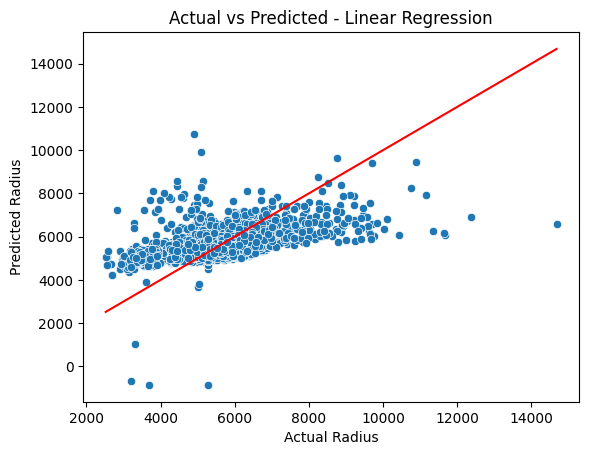

In [429]:
sns.scatterplot(x=y_reg8_test, y=y_reg8_pred_lr)
sns.lineplot(x=y_reg8_test, y=y_reg8_test, color='red')  
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\3533775480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


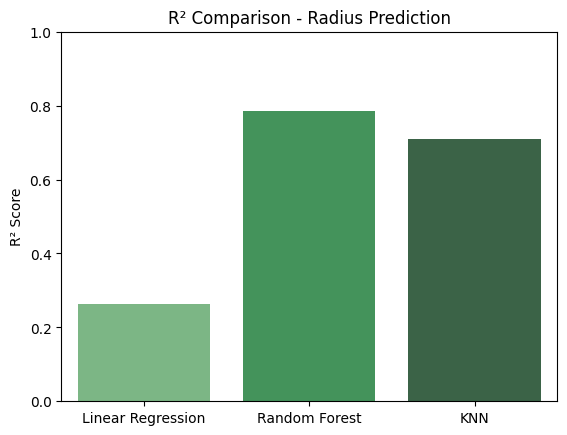

In [430]:
r2_scores = [
    r2_score(y_reg8_test, y_reg8_pred_lr),
    r2_score(y_reg8_test, y_reg8_pred_rf),
    r2_score(y_reg8_test, y_reg8_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)  # optional
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\2019507976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


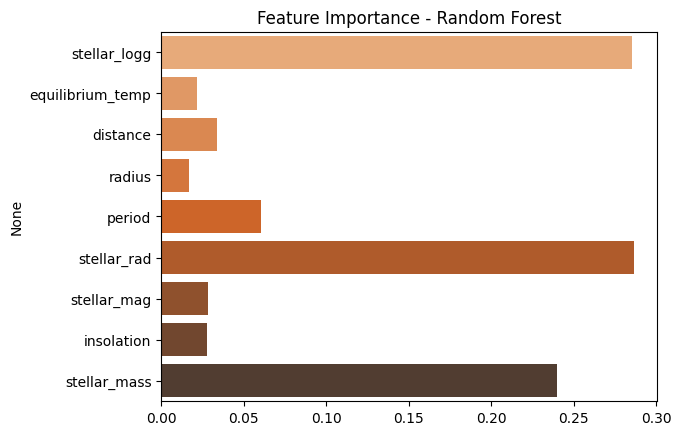

In [447]:
importances = Random_Forest_Regressor8.feature_importances_
features = x_reg8.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()


COMPARISON BETWEEN REGRESSION MODELS (TARGET STELLAR MASS)

In [431]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [432]:
x_reg9 = data[['stellar_logg','equilibrium_temp','distance','radius','period', 'stellar_teff', 'stellar_rad', 'stellar_mag', 'insolation']]
y_reg9 = data['stellar_mass'].astype(float)

scaler_reg9 = StandardScaler()
x_reg9_scaled = scaler_reg9.fit_transform(x_reg9)

In [433]:
x_reg9_train, x_reg9_test, y_reg9_train, y_reg9_test = train_test_split(x_reg9_scaled, y_reg9, test_size=0.2, random_state=42)

In [434]:
baseline_pred9 = np.full(shape=y_reg9_test.shape, fill_value=np.mean(y_reg9_train))

print("Baseline Model Results:")
print("R-squared :", r2_score(y_reg9_test, baseline_pred9))
print("Mean Squared Error :", mean_squared_error(y_reg9_test, baseline_pred9))
print("Mean Absolute Error :", mean_absolute_error(y_reg9_test, baseline_pred9))

Baseline Model Results:
R-squared : -0.2334421408064118
Mean Squared Error : 2.7025123964590776
Mean Absolute Error : 0.8905527744481343


In [435]:
Linear_Regressor9 = LinearRegression()

Linear_Regressor9.fit(x_reg9_train, y_reg9_train)
y_reg9_pred_lr = Linear_Regressor9.predict(x_reg9_test)
print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_reg9_test, y_reg9_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_reg9_test, y_reg9_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_reg9_test, y_reg9_pred_lr))


Linear Regression Results:
R² Score: -419.40138401728586
Mean Squared Error: 921.1132927990215
Mean Absolute Error: 5.888826473158967


In [436]:
Random_Forest_Regressor9 = RandomForestRegressor(n_estimators=100, random_state=42)

Random_Forest_Regressor9.fit(x_reg9_train, y_reg9_train)
y_reg9_pred_rf = Random_Forest_Regressor9.predict(x_reg9_test)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_reg9_test, y_reg9_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg9_test, y_reg9_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg9_test, y_reg9_pred_rf))


Random Forest Regressor Results:
R² Score: -652.5751661397595
Mean Squared Error: 1432.0047370488865
Mean Absolute Error: 1.1096822421641899


In [437]:
KNN_Regressor9 = KNeighborsRegressor(n_neighbors=5)

KNN_Regressor9.fit(x_reg9_train, y_reg9_train)
y_reg9_pred_knn = KNN_Regressor9.predict(x_reg9_test)
print("\nKNN Regressor Results:")
print("R² Score:", r2_score(y_reg9_test, y_reg9_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_reg9_test, y_reg9_pred_knn))
print("Mean Absolute Error:", mean_absolute_error(y_reg9_test, y_reg9_pred_knn))


KNN Regressor Results:
R² Score: -712.3835031930162
Mean Squared Error: 1563.0467753826465
Mean Absolute Error: 0.9973013021878092


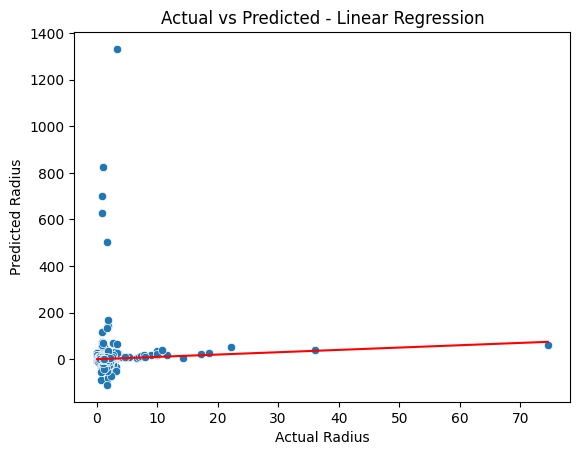

In [438]:
sns.scatterplot(x=y_reg9_test, y=y_reg9_pred_lr)
sns.lineplot(x=y_reg9_test, y=y_reg9_test, color='red')  
plt.xlabel("Actual Radius")
plt.ylabel("Predicted Radius")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\3209825067.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


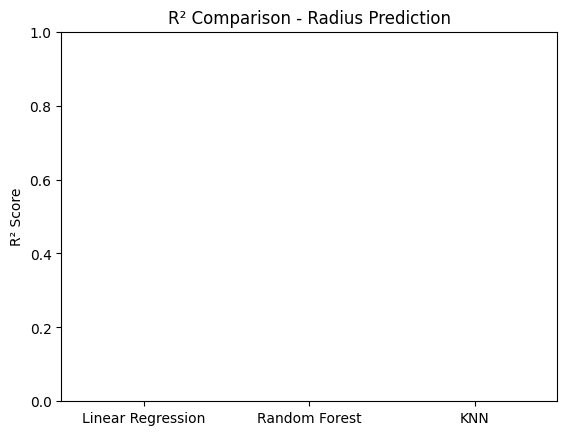

In [439]:
r2_scores = [
    r2_score(y_reg9_test, y_reg9_pred_lr),
    r2_score(y_reg9_test, y_reg9_pred_rf),
    r2_score(y_reg9_test, y_reg9_pred_knn)
]
models = ['Linear Regression', 'Random Forest', 'KNN']

sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.ylabel("R² Score")
plt.title("R² Comparison - Radius Prediction")
plt.ylim(0, 1)  # optional
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7832\2500955597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='Oranges_d')


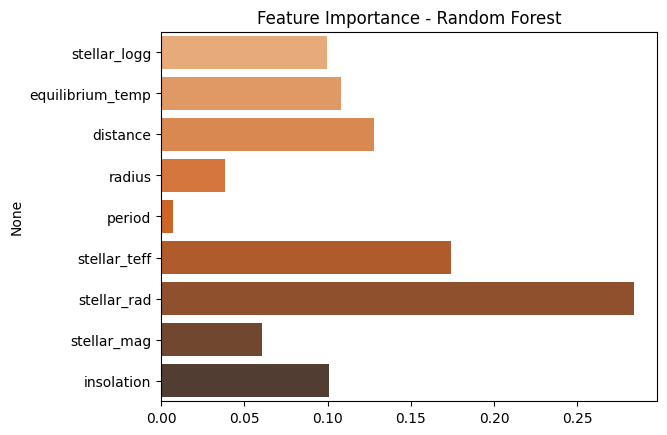

In [448]:
importances = Random_Forest_Regressor9.feature_importances_
features = x_reg9.columns

sns.barplot(x=importances, y=features, palette='Oranges_d')
plt.title("Feature Importance - Random Forest")
plt.show()
